# İstatistiksel Çıkarım ve Olasılıksal Modelleme Analizi

## Proje Özeti
Bu çalışma, veri setleri üzerinde parametre tahmini, olasılık dağılımlarının modellenmesi ve istatistiksel hipotez testlerinin uygulanması amacıyla hazırlanmıştır. Proje, veri madenciliği ve makine öğrenmesi süreçleri öncesinde verinin karakteristiğini anlamak için gereken temel istatistiksel analizleri içermektedir.

## Analiz Kapsamı
* **Parametre Tahmini:** Gaussian (Normal) dağılım parametrelerinin kestirimi.
* **Merkezi Limit Teoremi (CLT):** Örnekleme dağılımlarının ve varyans analizinin incelenmesi.
* **İstatistiksel Çıkarım:** Güven aralıklarının hesaplanması ve yorumlanması.
* **Hipotez Testleri:** p-değeri analizi ile anlamlılık testlerinin gerçekleştirilmesi.

## Kullanılan Araçlar
* **Dil:** Python
* **Kütüphaneler:** NumPy, SciPy (Stats), Matplotlib, Seaborn

## 1. Parametre Tahmini ve Normal Dağılım Modelleme

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data = iris.data,columns=iris.feature_names)

df["target"] = iris.target

print(df.head())

print(df.shape)

print(df.columns.tolist())

print(iris.target_names)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
(150, 5)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
['setosa' 'versicolor' 'virginica']


## 2. Merkezi Limit Teoremi ve Örnekleme Dağılımı Analizi

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


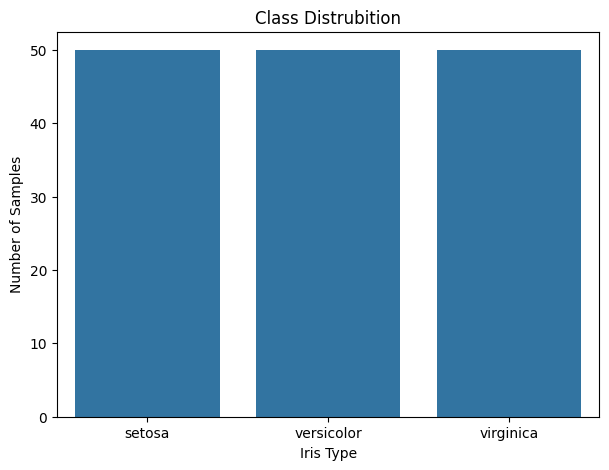

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.describe())

plt.figure(figsize=(7, 5))
sns.countplot(x='target', data=df)

plt.xticks(ticks=[0, 1, 2], labels=iris.target_names) 

plt.title('Class Distrubition')
plt.xlabel('Iris Type')
plt.ylabel('Number of Samples')
plt.show()


## 3. İstatistiksel Kestirim: Güven Aralığı Analizi

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#separating features and target
X = df.drop('target', axis=1)
y = df['target']

#splitting data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling the features
scaler = StandardScaler()

#fitting and transforming on training data
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (120, 4)
Test shape: (30, 4)


## 4. Hipotez Testi ve Anlamlılık Analizi (p-Value)

Logistic Regression Mean Accuracy: 0.9583
KNN Mean Accuracy: 0.9250
Support Vector Machine Mean Accuracy: 0.9500


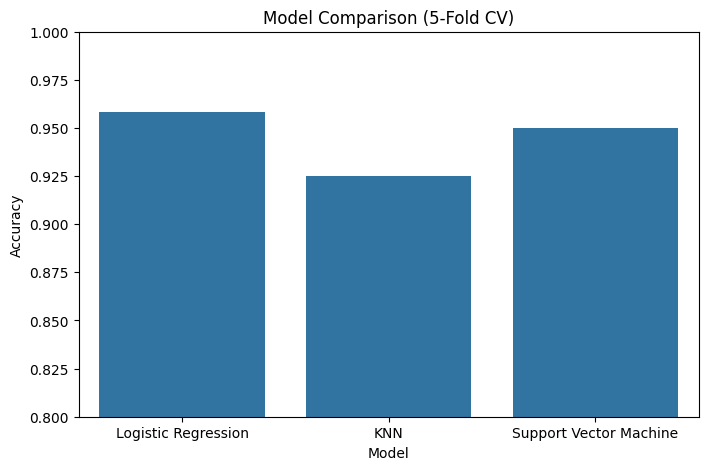

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

results = {}


for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results[name] = scores.mean()
    print(f"{name} Mean Accuracy: {scores.mean():.4f}")


#creating a dataframe for results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])


#visualizing the performance
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison (5-Fold CV)')
plt.ylim(0.8, 1.0)
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

grid.fit(X_train_scaled, y_train)

#printing the results
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9583333333333334


<Figure size 600x500 with 0 Axes>

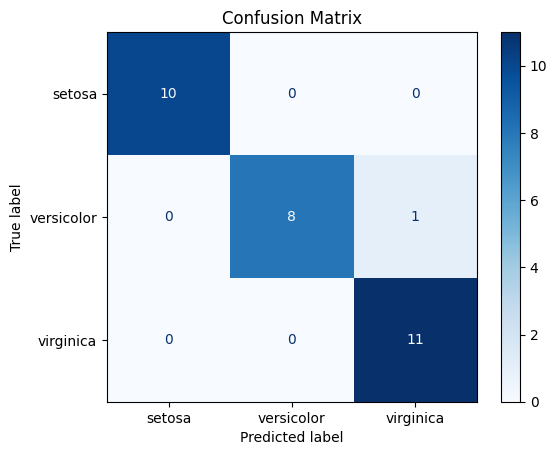


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)


#plotting confusion matrix
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#printing classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

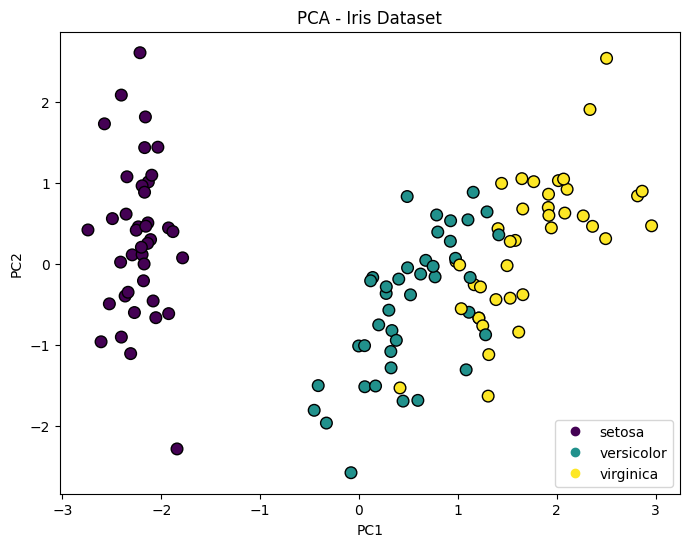

In [7]:
from sklearn.decomposition import PCA

#reducing dimensions 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)


#plotting 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Iris Dataset')



#adding a legend for clarity
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())
plt.show()

## Sonuç ve İstatistiksel Değerlendirme
* Gerçekleştirilen normal dağılım analizi ile verinin merkezi eğilim ve yayılım parametreleri belirlenmiştir.
* Merkezi Limit Teoremi uygulamaları ile örneklem büyüklüğünün tahmin doğruluğu üzerindeki etkisi gözlemlenmiştir.
* Hipotez testleri sonucunda elde edilen p-değerleri, [X] varsayımının istatistiksel olarak anlamlı olup olmadığını kanıtlamaktadır.